In [15]:
# !pip install pytorch==2.1.1
!pip install sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
ERROR: Could not find a version that satisfies the requirement pytorch==2.1.1 (from versions: 0.1.2, 1.0.2)
ERROR: No matching distribution found for pytorch==2.1.1
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of

In [9]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

In [10]:
sentences = [
    '그 공간에서 구운 스테이크 냄새가 난다는 사실이 그를 당황하게 만들었습니다',
    '그녀는 이를 칠할 것인지, 아니면 손톱을 닦을 것인지 결정할 수 없었다',
    '시간이 충분할 거라 생각했는데 시계를 숨겼나?',
    '꿀벌들은 여왕을 상대로 반란을 일으키기로 결정했습니다',
    '표지판에는 전방에 도로 공사가 있다고 적혀 있어서 그녀는 속도를 높이기로 결정했습니다',
    '1부터 10까지의 척도 중 당신이 가장 좋아하는 색상은 무엇입니까?',
    '날아다니는 쏘는 곤충들이 여주인에게 반대하여 반란을 일으켰다'
]

In [11]:
embeddings = model.encode(sentences=sentences)
embeddings.shape

(7, 768)

In [12]:
from sentence_transformers.util import cos_sim

scores = cos_sim(embeddings[-1], embeddings[:-1])
scores

tensor([[ 0.1891,  0.1574, -0.0323,  0.6142,  0.1978,  0.0341]])

In [13]:
sentences[scores.argmax().item()]

'꿀벌들은 여왕을 상대로 반란을 일으키기로 결정했습니다'

In [14]:
!pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [16]:
from transformers import DPRContextEncoderTokenizer, DPRContextEncoder, DPRQuestionEncoderTokenizer, DPRQuestionEncoder

In [17]:
ctx_model = DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
ctx_tokenizer = DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

question_model = DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokeniz

In [19]:
questions = [
    'what is the capital city of korea?',
    "what is the best selling sci-fi book?",
    "how many searches are performed on google?"
]

contexts = [
    "seoul is the capital city of korea",
    "what is the capital city of korea?",
    "the capital city of francec is paris",
    "what is the best selling sci-fi book?",
    "sc-fi is a popular book genre read by millions",
    "the best-selling sci-fi book is dune",
    "how many searches are performed on google?",
    "google serves more than 2 trillion queries annually",
    "google is a popular search engine"
]

In [20]:
xb_tokens = ctx_tokenizer(contexts, max_length=256, padding='max_length', return_tensors='pt')
xb = ctx_model(**xb_tokens)

xq_tokens = question_tokenizer(questions, max_length=256, padding='max_length', return_tensors='pt')
xq = question_model(**xq_tokens)

In [21]:
xq.keys()

odict_keys(['pooler_output'])

In [24]:
xq.pooler_output.shape, xb.pooler_output.shape

(torch.Size([3, 768]), torch.Size([9, 768]))

In [25]:
import torch

for i, xq_vector in enumerate(xq.pooler_output):
    probs = cos_sim(xq_vector, xb.pooler_output)
    argmax = torch.argmax(probs)
    print(questions[i])
    print(contexts[argmax])
    print('-----')

what is the capital city of korea?
seoul is the capital city of korea
-----
what is the best selling sci-fi book?
the best-selling sci-fi book is dune
-----
how many searches are performed on google?
how many searches are performed on google?
-----


In [28]:
from transformers import CLIPProcessor, CLIPModel

In [29]:
model_name = 'openai/clip-vit-base-patch32'
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

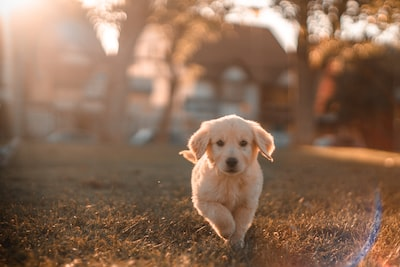

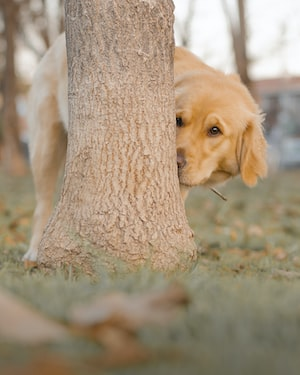

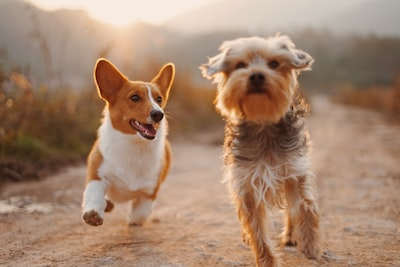

In [32]:
import requests
import matplotlib as plt
import numpy as np
from PIL import Image

urls = [
    "https://images.unsplash.com/photo-1576201836106-db1758fd1c97?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80",
    "https://images.unsplash.com/photo-1591294100785-81d39c061468?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=300&q=80",
    "https://images.unsplash.com/photo-1548199973-03cce0bbc87b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80"
]

images = [Image.open(requests.get(url, stream=True).raw) for url in urls]

for image in images:
    display(image)

In [33]:
captions = [
    "a dog hiding behind a tree",
    "two dogs running",
    "a dog running",
    "a cucumber on a tree",
    "trees in the park",
    "a cucumber dog"
]

In [37]:
inputs = processor(text=captions, images=images, return_tensors='pt', padding=True)
inputs

{'input_ids': tensor([[49406,   320,  1929, 11371,  2403,   320,  2677, 49407],
        [49406,  1237,  3255,  2761, 49407, 49407, 49407, 49407],
        [49406,   320,  1929,  2761, 49407, 49407, 49407, 49407],
        [49406,   320, 19787,   525,   320,  2677, 49407, 49407],
        [49406,  4682,   530,   518,  1452, 49407, 49407, 49407],
        [49406,   320, 19787,  1929, 49407, 49407, 49407, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0]]), 'pixel_values': tensor([[[[ 1.9303e+00,  1.9157e+00,  1.9157e+00,  ...,  9.0845e-01,
            8.9385e-01,  8.3545e-01],
          [ 1.9011e+00,  1.8865e+00,  1.8865e+00,  ...,  6.4567e-01,
            6.1648e-01,  5.4349e-01],
          [ 1.8427e+00,  1.8427e+00,  1.8573e+00,  ...,  5.8728e-01,
            4.2670e-01,  2.9531e-01],
          ...,
          [ 

In [38]:
outputs = model(**inputs)
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[23.8098, 26.4604, 29.6173, 15.3659, 17.6663, 22.0691],
        [35.7230, 22.9442, 24.2325, 23.6661, 23.4402, 21.4122],
        [16.7632, 31.2669, 28.5522, 10.8606, 16.0870, 19.7398]],
       grad_fn=<TBackward0>), logits_per_text=tensor([[23.8098, 35.7230, 16.7632],
        [26.4604, 22.9442, 31.2669],
        [29.6173, 24.2325, 28.5522],
        [15.3659, 23.6661, 10.8606],
        [17.6663, 23.4402, 16.0870],
        [22.0691, 21.4122, 19.7398]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 0.0146,  0.0180, -0.0234,  ..., -0.0266, -0.0500,  0.0710],
        [ 0.0117, -0.0137, -0.0734,  ..., -0.0049,  0.0094, -0.0250],
        [-0.0021, -0.0179, -0.0378,  ..., -0.0335,  0.0086, -0.0112],
        [ 0.0334,  0.0516,  0.0420,  ...,  0.0053, -0.0176,  0.0114],
        [ 0.0033,  0.0463,  0.0084,  ..., -0.0199, -0.0736,  0.0331],
        [ 0.0221, -0.0102,  0.0247,  ...,  0.0010, -0.0203,  0.0188]],
       grad_fn=<DivBackward0>), image_emb

In [40]:
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [47]:
probs = outputs.logits_per_image.argmax(dim=1)
probs # 이미지 3개에 대해 각각 caption2, caption0, caption1을 예측함

tensor([2, 0, 1])

a dog running


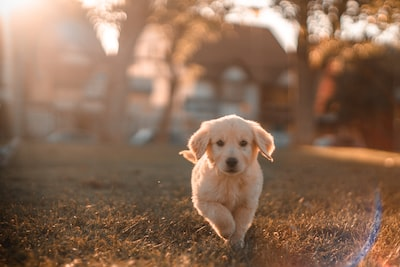

a dog hiding behind a tree


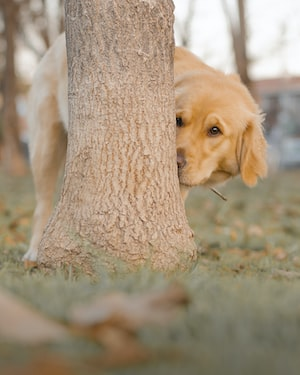

two dogs running


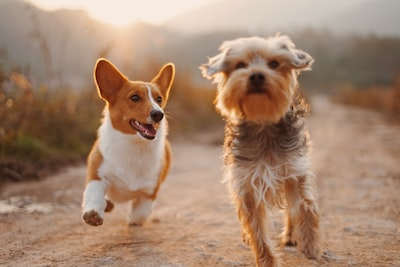

In [50]:
for i, image in enumerate(images):
    print(captions[probs[i]])
    display(image)

In [51]:
outputs.text_embeds.shape, outputs.image_embeds.shape

(torch.Size([6, 512]), torch.Size([3, 512]))

In [52]:
xq = outputs.text_embeds[0]
xb = outputs.image_embeds

In [54]:
# caption1번과 이미지 3개 각각에 대한 유사도
sim = cos_sim(xq, xb)
sim

tensor([[0.2381, 0.3572, 0.1676]], grad_fn=<MmBackward0>)

In [56]:
pred = sim.argmax().item()
pred

1